# Поиск аномалий

Зачем искать выбросы?

* Для анализа данных, для лучшего понимания данных
* Для улучшения качества предсказательных моделей

In [60]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pylab as plt
%pylab inline

boston = load_boston()
X = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 1. Однофакторный анализ

Ищем выбросы по каждому признаку в отдельности.

Посмотрим на распределение признака.

*Если мы хотим удалять выбросы через Z-score или интерквартильный размах, то такой подход применим только к данным, имеющим нормальное распределение!*

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

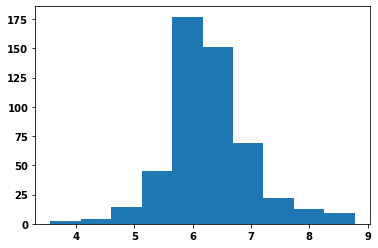

In [128]:
hist(boston_df['RM'])

### Z-score

Стандартизованная оценка (z-оценка, англ. : Standard score, z-score) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает сколько стандартных отклонений составляет его разброс относительного среднего значения.

**Интуиция.**
Вычисляя Z-score, мы масштабируем и центрируем данные и смотрим на точки, которые находятся далеко от 0. Точки, которые достаточно далеко от 0, считаются выбросами. В большинстве случаев используется порог 3 или -3, т.е. если Z-score больше 3 или меньше -3, то точка считается выбросом.

In [9]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df['RM']))
print(z)

[4.13671889e-01 1.94274453e-01 1.28271368e+00 1.01630251e+00
 1.22857665e+00 2.07096381e-01 3.88410945e-01 1.60465557e-01
 9.31205901e-01 3.99808215e-01 1.31589471e-01 3.92684921e-01
 5.63643963e-01 4.78164442e-01 2.68739617e-01 6.42000190e-01
 4.98109663e-01 4.19753436e-01 1.18052117e+00 7.94438668e-01
 1.01811008e+00 4.55369903e-01 2.03205317e-01 6.71918022e-01
 5.13780909e-01 9.76794979e-01 6.71918022e-01 3.38547892e-01
 2.99699195e-01 5.54713098e-01 8.14383890e-01 3.02931425e-01
 4.76739783e-01 8.31479794e-01 2.68739617e-01 5.00958981e-01
 6.32027579e-01 6.19205651e-01 4.53945244e-01 4.42165063e-01
 1.05334363e+00 6.91480331e-01 1.64739533e-01 1.04903869e-01
 3.07205401e-01 8.58548308e-01 7.10383806e-01 3.62767089e-01
 1.26172671e+00 9.72521003e-01 4.58219220e-01 2.41671102e-01
 3.22493734e-01 4.08356167e-01 5.65068621e-01 1.37389184e+00
 1.40137423e-01 7.57014630e-01 1.98931341e-01 5.09506933e-01
 7.74493447e-01 4.53945244e-01 2.44137507e-01 6.80083062e-01
 1.16731633e+00 7.644166

In [26]:
#threshold = 3
np.where(z > 3)

(array([225, 257, 262, 364, 365, 367, 374, 406], dtype=int64),)

Как удалить выбросы

In [ ]:
boston_df_o = boston_df.iloc[np.where(z <= 3)[0]]

In [ ]:
boston_df.shape, boston_df_o.shape

### IQR

IQR (интерквартильный размах) = Q3 - Q1, где Q1, Q3 - 25%- и 75%- квантили распределения соответственно.

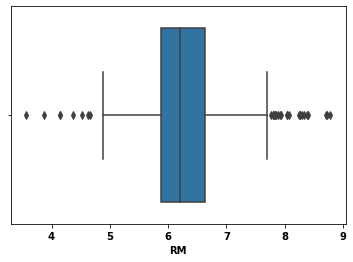

In [16]:
import seaborn as sns
sns.boxplot(x=boston_df['RM'])

In [17]:
Q1 = boston_df['RM'].quantile(0.25)
Q3 = boston_df['RM'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.7380000000000004


In [34]:
(boston_df['RM'] < (Q1 - 1.5 * IQR)) | (boston_df['RM'] > (Q3 + 1.5 * IQR))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

In [46]:
iqr_norm = np.where((boston_df['RM'] >= (Q1 - 1.5 * IQR)) & (boston_df['RM'] <= (Q3 + 1.5 * IQR)))
iqr_norm

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 164, 165, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 181, 182, 183

Как удалить выбросы

In [49]:
boston_df_out = boston_df.iloc[iqr_norm]

In [50]:
boston_df_out.shape, boston_df.shape

((476, 13), (506, 13))

## 2. Многофакторный анализ

Объект может быть выбросом не по какому-то признаку в отдельности, а по совокупности признаков. В этом случае для детектирования аномалий можно использовать разные подходы. 

### Первый подход: визуализация

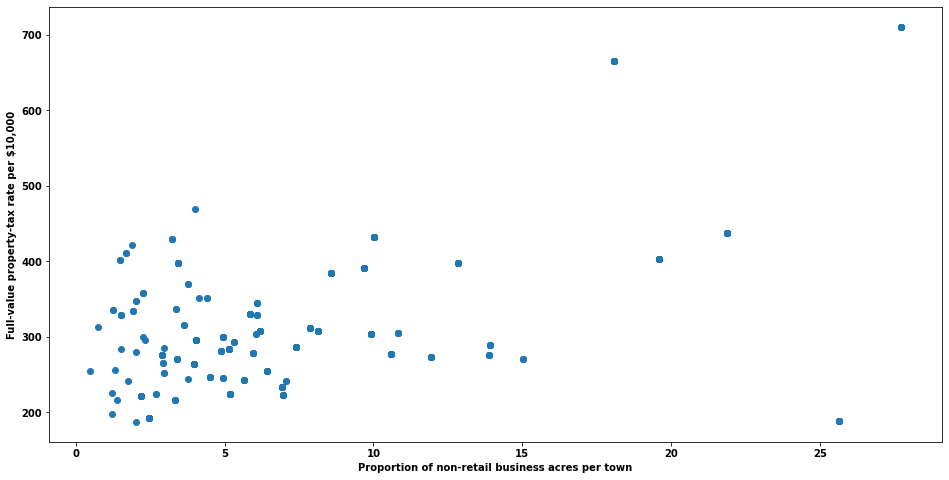

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [58]:
boston_df_clean = boston_df[~((boston_df['INDUS'] > 20) & (boston_df['TAX'] > 300))]

In [59]:
boston_df.shape, boston_df_clean.shape

((506, 13), (486, 13))

### Второй подход: алгоритмы поиска выбросов

* Сначала обучим модель на исходных (грязных) данных и оценим её качество.
* Затем удалим выбросы с помощью модели машинного обучения и посмотрим, помогает ли это улучшить качество модели.

In [198]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(boston_df, y, test_size=0.3, random_state=111)

In [199]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

In [200]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytest, pred)

3.606279528312036

Найдем выбросы с помощью алгоритма *IsolationForest*

* Найдем выбросы в тренировочных данных и удалим их, чтобы алгоритму было легче обучаться
* Тестовые данные чистить не будем, так как алгоритм должен уметь работать с любыми данными

In [202]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1, random_state=100)
clf.fit(Xtrain)

outliers_train = clf.predict(Xtrain)

In [203]:
outliers_train[:20]

array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Удалим выбросы

In [204]:
Xtrain_clean = Xtrain[outliers_train == 1]
ytrain_clean = ytrain[outliers_train == 1]

In [205]:
Xtrain.shape, Xtrain_clean.shape

((354, 13), (318, 13))

Заново обучим модель, уже на очищенных данных

In [206]:
model.fit(Xtrain_clean, ytrain_clean)

pred = model.predict(Xtest)

Оценим качество предсказания

In [207]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(ytest, pred)

3.5795475177361356

Путём удаления выбросов нам удалось улучшить качество предсказания модели!